In [1]:
import numpy as np
import matplotlib.pylab as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, RobustScaler
from scipy.stats import pearsonr
import copy
from scipy import optimize as opt
import altmin_pca
from orthoDictLearning import OrthoDictLearning

In [2]:
mot_bursts=np.load('mot_bursts.npy')
vis_bursts=np.load('vis_bursts.npy')
all_bursts=np.vstack([mot_bursts, vis_bursts])
#Create corresponding labels
y = np.hstack([np.zeros(mot_bursts.shape[0]), np.ones(vis_bursts.shape[0])])
# Shufffle data
idx = np.arange(all_bursts.shape[0])
np.random.shuffle(idx)
all_bursts = all_bursts[idx]
y = y[idx]
print(all_bursts.shape)
ncomps=5
burst_std=RobustScaler().fit_transform(all_bursts)
pca = PCA(n_components=ncomps)
pcs = pca.fit_transform(burst_std)

(808, 156)


IndexError: index 7 is out of bounds for axis 0 with size 5

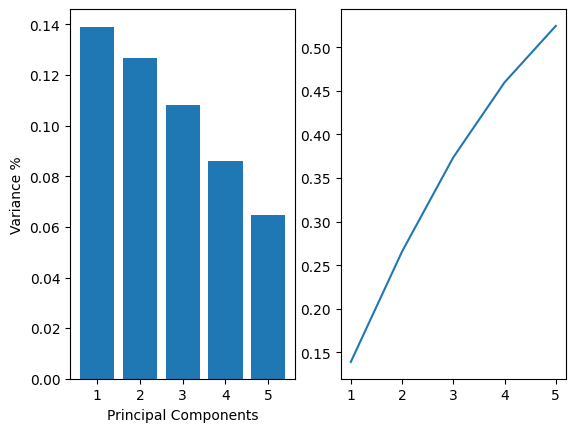

In [3]:
%%time
# Plotting the variances for each PC
PC = range(1, pca.n_components_+1)
plt.figure(facecolor='w')
plt.subplot(1,2,1)
plt.bar(PC, pca.explained_variance_ratio_)
plt.xlabel('Principal Components')
plt.ylabel('Variance %')
plt.xticks(PC)

plt.subplot(1,2,2)
plt.plot(range(1,len(PC)+1),pca.explained_variance_ratio_.cumsum())

pcs_to_analyze=20
print(pca.explained_variance_ratio_.cumsum()[ncomps-1])

In [4]:
%%time
[W,C]=altmin_pca.pca(burst_std, ncomps)

PC1: iterations=40, error=251.54449445279147
PC2: iterations=23, error=232.327129738906
PC3: iterations=20, error=214.56697285864018
PC4: iterations=21, error=199.3072547625918
PC5: iterations=18, error=186.99806092691497
CPU times: total: 4.47 s
Wall time: 1min 5s


Text(0, 0.5, 'optimized PCA')

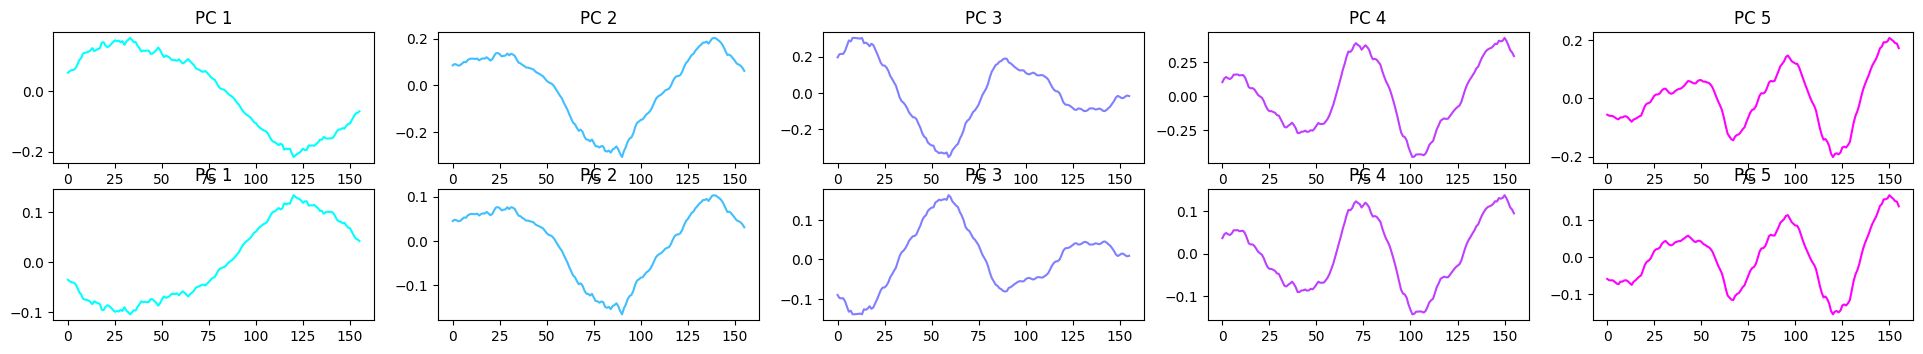

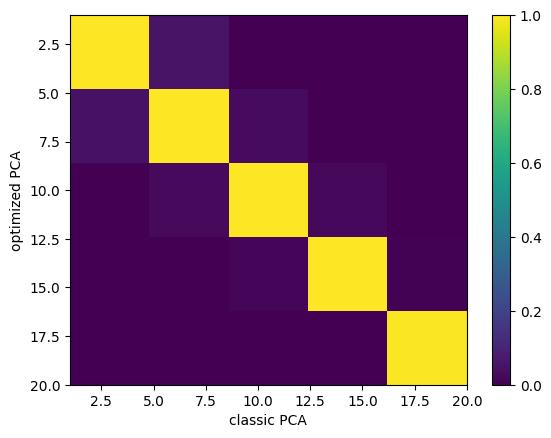

In [5]:
cool_colors = plt.cm.cool(np.linspace(0,1,ncomps))
plt.figure(figsize=(24,16), facecolor='w')
for i in range(ncomps):
    plt.subplot(8,5,i+1)
    plt.plot(C[i,:],color=cool_colors[i])
    plt.title('PC {}'.format((i+1)))
for i in range(ncomps):
    plt.subplot(8,5,ncomps+i+1)
    plt.plot(pca.components_[i,:],color=cool_colors[i])
    plt.title('PC {}'.format((i+1)))
    
corrmat=np.zeros((ncomps,ncomps))
for i in range(ncomps):
    for j in range(ncomps):
        res=pearsonr(pca.components_[i,:],C[j,:])
        corrmat[i,j]=np.abs(res[0])
plt.figure()
ax=plt.subplot(1,1,1)
i1=ax.imshow(corrmat, aspect='auto', origin='upper',
             extent=[1, pcs_to_analyze, pcs_to_analyze, 1], vmin=0, vmax=1)
i1.set_clim([0,1])
plt.colorbar(i1)
ax.set_xlabel('classic PCA')
ax.set_ylabel('optimized PCA')


In [6]:
%%time
[W,C]=altmin_pca.quadratically_regularized_pca(burst_std, ncomps, alpha=50)

In [ ]:
cool_colors = plt.cm.cool(np.linspace(0,1,ncomps))
plt.figure(figsize=(24,16), facecolor='w')
for i in range(ncomps):
    plt.subplot(8,5,i+1)
    plt.plot(C[i,:],color=cool_colors[i])
    plt.title('PC {}'.format((i+1)))
for i in range(ncomps):
    plt.subplot(8,5,ncomps+i+1)
    plt.plot(pca.components_[i,:],color=cool_colors[i])
    plt.title('PC {}'.format((i+1)))
    
corrmat=np.zeros((ncomps,ncomps))
for i in range(ncomps):
    for j in range(ncomps):
        res=pearsonr(pca.components_[i,:], C[j,:])
        corrmat[i,j]=np.abs(res[0])
plt.figure()
ax=plt.subplot(1,1,1)
i1=ax.imshow(corrmat, aspect='auto', origin='upper',
             extent=[1, pcs_to_analyze, pcs_to_analyze, 1], vmin=0, vmax=1)
i1.set_clim([0,1])
plt.colorbar(i1)
ax.set_xlabel('classic PCA')
ax.set_ylabel('optimized PCA')

In [ ]:
%%time
[W,C]=altmin_pca.sparse_pca(burst_std, ncomps, alpha=20)

In [ ]:
cool_colors = plt.cm.cool(np.linspace(0,1,ncomps))
plt.figure(figsize=(24,16), facecolor='w')
for i in range(ncomps):
    plt.subplot(8,5,i+1)
    plt.plot(C[i,:],color=cool_colors[i])
    plt.title('PC {}'.format((i+1)))
for i in range(ncomps):
    plt.subplot(8,5,ncomps+i+1)
    plt.plot(pca.components_[i,:],color=cool_colors[i])
    plt.title('PC {}'.format((i+1)))
    
corrmat=np.zeros((ncomps,ncomps))
for i in range(ncomps):
    for j in range(ncomps):
        res=pearsonr(pca.components_[i,:], C[j,:])
        corrmat[i,j]=np.abs(res[0])
plt.figure()
ax=plt.subplot(1,1,1)
i1=ax.imshow(corrmat, aspect='auto', origin='upper',
             extent=[1, pcs_to_analyze, pcs_to_analyze, 1], vmin=0, vmax=1)
i1.set_clim([0,1])
plt.colorbar(i1)
ax.set_xlabel('classic PCA')
ax.set_ylabel('optimized PCA')

In [ ]:
%%time
odl = OrthoDictLearning(n_comps=ncomps, alpha1=5, alpha2=10, reg='l1', verbose=2)
W = odl.fit_transform(burst_std, y)
C = odl.components_

In [ ]:
cool_colors = plt.cm.cool(np.linspace(0,1,ncomps))
plt.figure(figsize=(24,16), facecolor='w')
for i in range(ncomps):
    plt.subplot(8,5,i+1)
    plt.plot(C[i,:],color=cool_colors[i])
    plt.title('PC {}'.format((i+1)))
for i in range(ncomps):
    plt.subplot(8,5,ncomps+i+1)
    plt.plot(pca.components_[i,:],color=cool_colors[i])
    plt.title('PC {}'.format((i+1)))
    
corrmat=np.zeros((ncomps,ncomps))
for i in range(ncomps):
    for j in range(ncomps):
        res=pearsonr(pca.components_[i,:], C[j,:])
        corrmat[i,j]=np.abs(res[0])
plt.figure()
ax=plt.subplot(1,1,1)
i1=ax.imshow(corrmat, aspect='auto', origin='upper',
             extent=[1, pcs_to_analyze, pcs_to_analyze, 1], vmin=0, vmax=1)
i1.set_clim([0,1])
plt.colorbar(i1)
ax.set_xlabel('classic PCA')
ax.set_ylabel('optimized PCA')